In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('max_columns', 200)

In [2]:
df = pd.read_csv('../oof_pred/for_error_analysis.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lasso_oof,ridge_oof,forest_oof,xgb_oof,lgb_oof,target
0,1233,90,RL,70.0,9842,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1224,0,0,1224,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1962.0,Unf,2,462,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,11.555853,11.573088,11.655304,11.600304,11.571178,11.530775
1,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.846610,11.844509,11.805784,11.860367,11.855860,11.864469
2,243,50,RM,63.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,4,1900,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,540,540,GasA,Gd,N,FuseA,889,551,0,1440,0,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1940.0,Unf,1,352,Fa,TA,Y,0,0,77,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,11.459496,11.436707,11.589603,11.441122,11.410178,11.277216
3,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046,Unf,0,168,1214,GasW,Ex,N,SBrkr,1260,1031,0,2291,0,1,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2,506,TA,TA,Y,0,0,0,0,99,0,NaN,NaN,NaN,0,11,2007,WD,Normal,12.077764,12.076719,12.012558,12.025039,12.047149,11.804856
4,1270,50,RL,78.0,11344,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1.5Fin,5,5,1958,1958,Gable,CompShg,MetalSd,MetalSd,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,BLQ,460,Unf,0,414,874,GasW,TA,Y,FuseA,874,650,0,1524,0,0,1,1,3,1,TA,7,Typ,0,NaN,Attchd,1958.0,Unf,1,315,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,11.754415,11.729797,11.830394,11.807817,11.826274,11.877576


In [6]:
def plot_correlations(data, target=None, limit=50, figsize=(12,10), **kwargs):
    '''
    This function  plots the correlation matrix of a dataframe
    If a target feature is provided, it will display only a certain amount of features, the ones correlated the most
    with the target. The number of features displayed is controlled by the parameter limit
    '''
    corr = data.corr()
    if target:
        corr['abs'] = abs(corr[target])
        cor_target = corr.sort_values(by='abs', ascending=False)[target]
        cor_target = cor_target[:limit]
        del corr['abs']
        corr = corr.loc[cor_target.index, cor_target.index]
    plt.figure(figsize=figsize)
    ax = sns.heatmap(corr, cmap='RdBu_r', **kwargs)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    return cor_target

target        1.000000
ridge_oof     0.956344
lasso_oof     0.956183
xgb_oof       0.955038
lgb_oof       0.953418
forest_oof    0.948226
Name: target, dtype: float64

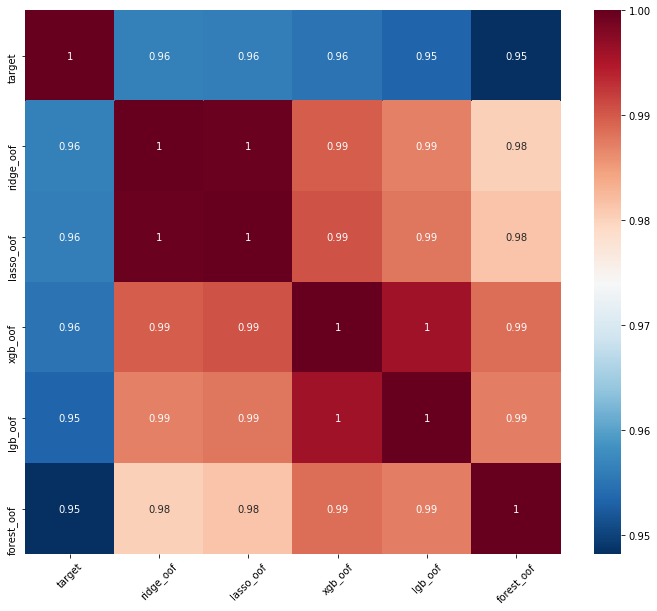

In [7]:
plot_correlations(df[[col for col in df.columns if '_oof' in col]+['target']], target='target', annot=True)

target        1.000000
ridge_oof     0.956344
lasso_oof     0.956183
xgb_oof       0.955038
lgb_oof       0.953418
forest_oof    0.948226
res_forest    0.558354
res_xgb       0.341029
res_lgb       0.325891
res_lasso     0.305659
res_ridge     0.291753
Name: target, dtype: float64

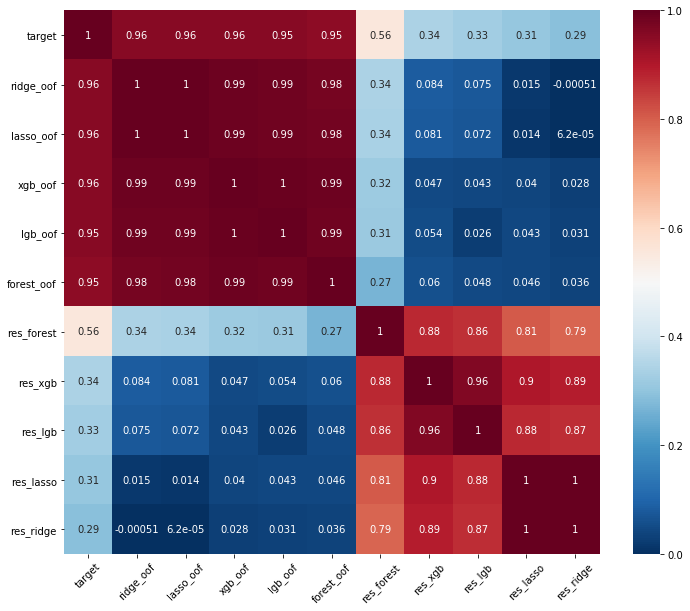

In [9]:
models = ['lasso', 'ridge', 'forest', 'xgb', 'lgb']

for model in models:
    df['res_'+model] = df['target'] - df[model+'_oof']
    
plot_correlations(df[[col for col in df.columns if '_oof' in col]+
                     [col for col in df.columns if 'res_' in col]+
                     ['target']], target='target', annot=True)

res_lgb          1.000000
res_xgb          0.961143
res_lasso        0.877254
res_ridge        0.868569
res_forest       0.864627
target           0.325891
BsmtFinSF1       0.100632
YrSold          -0.080069
OverallCond      0.076944
ridge_oof        0.075335
lasso_oof        0.072498
Id              -0.066717
LowQualFinSF    -0.064402
TotalBsmtSF      0.061472
LotArea          0.059632
GrLivArea        0.058686
ScreenPorch      0.052852
1stFlrSF         0.048997
WoodDeckSF       0.048407
OverallQual      0.047939
forest_oof       0.047676
PoolArea         0.044772
YearBuilt        0.044479
Fireplaces       0.044136
xgb_oof          0.043154
KitchenAbvGr    -0.041202
MasVnrArea       0.040290
GarageCars       0.039057
YearRemodAdd     0.037888
2ndFlrSF         0.033847
TotRmsAbvGrd     0.032270
BsmtUnfSF       -0.032132
BsmtFullBath     0.029115
HalfBath         0.028828
lgb_oof          0.025527
LotFrontage      0.024109
BsmtFinSF2      -0.022572
MSSubClass       0.017471
FullBath    

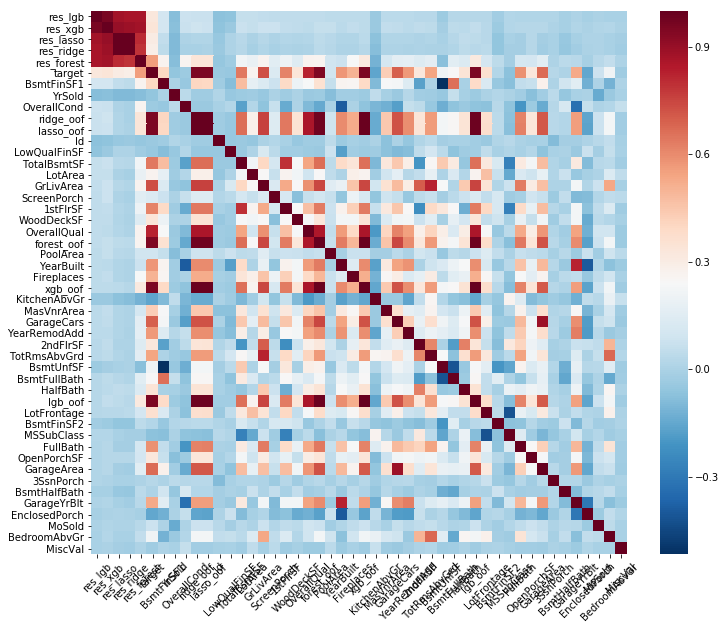

In [84]:
plot_correlations(df, target='res_lgb')

In [10]:
def corr_target(data, target, cols, x_estimator=None):
    '''
    Scatterplot + linear regression of a list of columns against the target.
    A correlation matrix is also printed.
    It is possible to pass an estimator.
    '''
    print(data[cols+[target]].corr())
    num = len(cols)
    rows = int(num/2) + (num % 2 > 0)
    cols = list(cols)
    y = data[target]
    fig, ax = plt.subplots(rows, 2, figsize=(12, 5 * (rows)))
    i = 0
    j = 0
    for feat in cols:
        x = data[feat]
        if (rows > 1):
            sns.regplot(x=x, y=y, ax=ax[i][j], x_estimator=x_estimator)
            j = (j+1)%2
            i = i + 1 - j
        else:
            sns.regplot(x=x, y=y, ax=ax[i], x_estimator=x_estimator)
            i = i+1

            lasso_oof  ridge_oof  forest_oof   xgb_oof   lgb_oof  res_lasso  \
lasso_oof    1.000000   0.999656    0.981546  0.990628  0.987936   0.013508   
ridge_oof    0.999656   1.000000    0.980228  0.989843  0.987201   0.015176   
forest_oof   0.981546   0.980228    1.000000  0.988508  0.987443   0.046349   
xgb_oof      0.990628   0.989843    0.988508  1.000000  0.996088   0.040077   
lgb_oof      0.987936   0.987201    0.987443  0.996088  1.000000   0.043297   
res_lasso    0.013508   0.015176    0.046349  0.040077  0.043297   1.000000   
res_ridge    0.000062  -0.000514    0.036422  0.028258  0.031364   0.996234   
res_forest   0.338323   0.342254    0.265968  0.316660  0.314526   0.806682   
res_xgb      0.080560   0.083588    0.060472  0.046984  0.053931   0.902735   
res_lgb      0.072498   0.075335    0.047676  0.043154  0.025527   0.877254   
target       0.956183   0.956344    0.948226  0.955038  0.953418   0.305659   

            res_ridge  res_forest   res_xgb   res_l

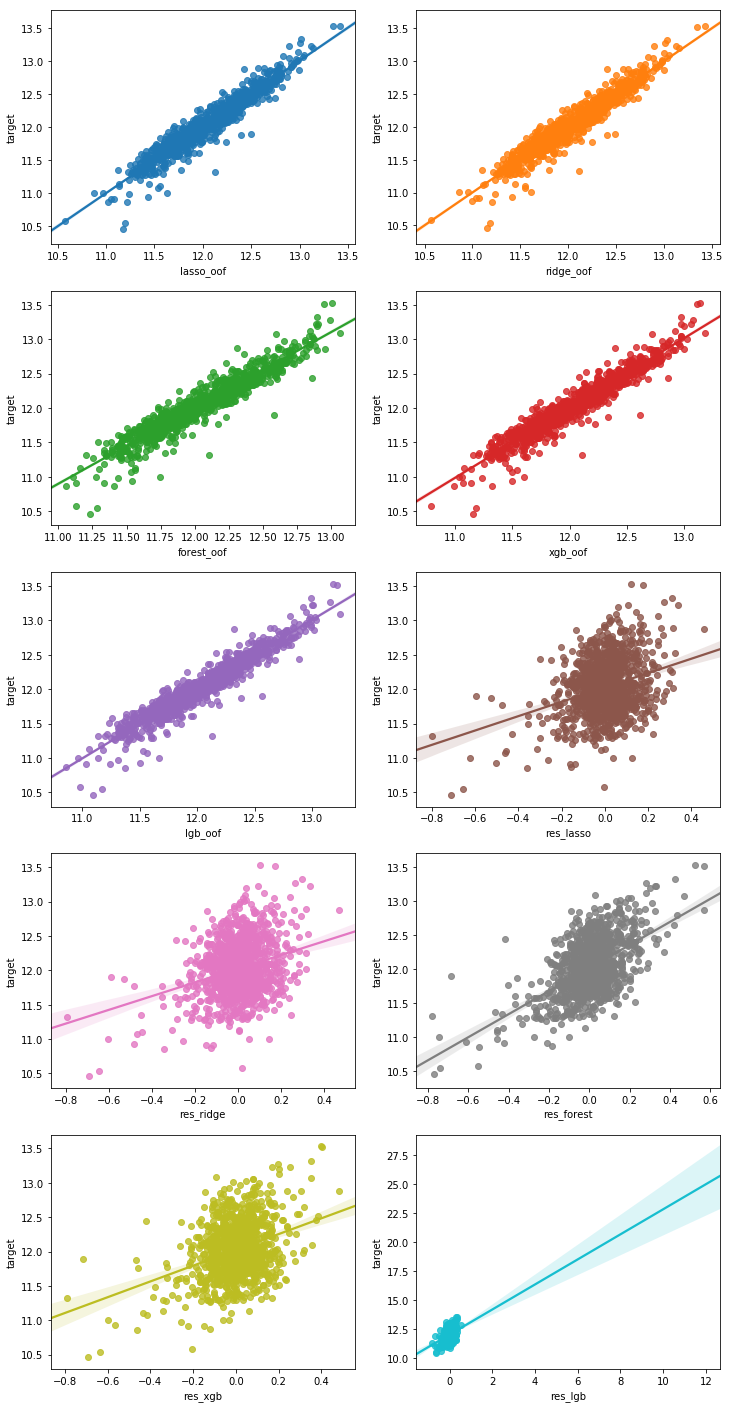

In [11]:
corr_target(df, 'target', 
            [col for col in df.columns if '_oof' in col]+[col for col in df.columns if 'res_' in col])

In [12]:
def segm_target(data, cat, target):
    '''
    Studies the target segmented by a categorical feature.
    It plots both a boxplot and a distplot for visual support
    '''
    df = data.groupby(cat)[target].agg(['count', 'mean', 'max', 
                                        'min', 'median', 'std'])
    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    sns.boxplot(cat, target, data=data, ax=ax[0])
    for val in data[cat].unique():
        tmp = data[data[cat] == val]
        sns.distplot(tmp[target], hist=False, kde=True,
                 kde_kws = {'linewidth': 3},
                 label = val, ax=ax[1])  
    return df

In [16]:
[col for col in df.columns if 'res_' in col]

['res_lasso', 'res_ridge', 'res_forest', 'res_xgb', 'res_lgb']

In [19]:
cat_cols = df.columns[df.dtypes == object].tolist()
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

/home/lucabasa/.local/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/lucabasa/.local/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,count,mean,max,min,median,std
MasVnrType,,,,,,
BrkCmn,11,-0.077829,0.080029,-0.458068,-0.021547,0.149754
BrkFace,352,0.004502,0.481880,-0.791969,0.013588,0.119811
None,697,-0.000320,0.403561,-0.692145,0.003958,0.120676
Stone,98,0.012344,0.352386,-0.196196,0.003898,0.097823


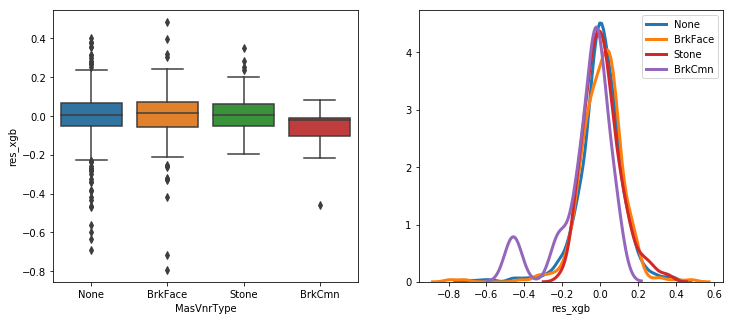

In [80]:
n += 1
segm_target(df, cat_cols[n], 'res_xgb')